### Penerapan OCR tidak hanya pada plat saja, tetapi bisa juga pada media lain selama ada citra yang berisi huruf dan angka

In [ ]:
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 53.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 50.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

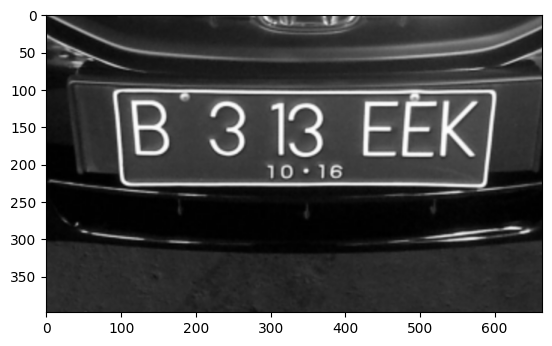

In [24]:
img = cv2.imread('Plat B.jpeg')

# UBAH GAMBAR WARNA KE GRAYSCALE
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# TAMPILKAN MENGGUNAKAN LIBRARY MATPLOTLIB
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

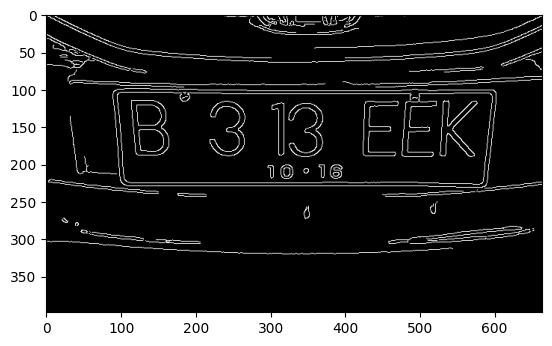

In [25]:
# SMOOTHING GAMBAR DENGAN BILATERAL FILTER
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

# EDGE DETECTION DENGAN METODE CANNY
edged = cv2.Canny(bfilter, 30, 100)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [26]:
"""
FIND CONTOURS MENDETEKSI PERUBAHAN WARNA GAMBAR DAN MENANDAINYA SEBAGAT KONTUR.
GAMBAR ATAU ANGKA YANG TERTULIS PADA CITRA AKAN DIDETEKSI SEBAGAI KONTUR.
"""
keypoints = cv2.findContours (edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [27]:
"""
APPROXPOLYDP MEMUNGKINKAN PERKIRAAN POLIGON (GAMBAR BANYAK SUDUT),
JADI JIKA GAMBAR BERISI POLIGON, FUNGSI INI AKAN CUKUP AKURAT MENDETEKSINYA.
"""
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [28]:
location

array([[[ 89, 106]],

       [[108, 229]],

       [[590, 225]],

       [[599, 101]]], dtype=int32)

In [29]:
"""
DRAWCONTOURS BERFUNGSI UNTUK MELAPISI KONTUR PADA GAMBAR RGB ASLI.
"""
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours (mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

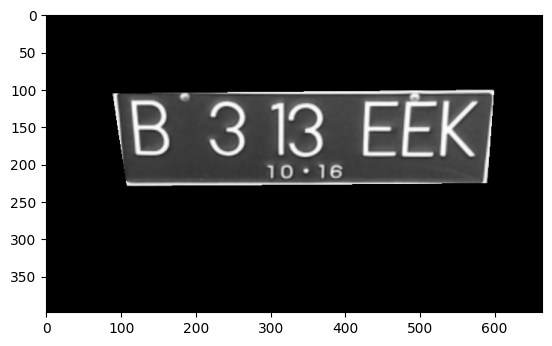

In [30]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [31]:
# CROPPING GAMBAR
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

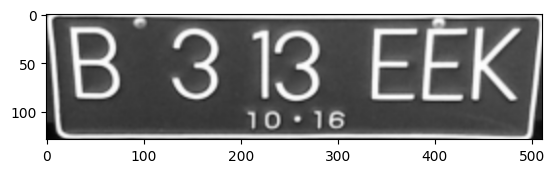

In [32]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

In [33]:
# PENERAPAN LIBRARY EASYOCR
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[16, 4], [296, 4], [296, 100], [16, 100]], 'B 3 13', 0.5650671047641428),
 ([[324, 0], [500, 0], [500, 102], [324, 102]], 'EEK', 0.9985183337951484),
 ([[202, 96], [250, 96], [250, 122], [202, 122]], '10', 0.9737012844719771),
 ([[270, 96], [314, 96], [314, 124], [270, 124]], '16', 0.9999221135123715)]

In [34]:
"""
DART KONVERSI OCR TERDAPAT 3 LIST (DALAM BAHASA PEMROGRAMAN LAIN DISEBUT DENGAN ARRAY),
UNTUK MENGELIMINASI BILANGAN YANG TIDAK PENTING DAN HANYA MENGAMBIL VALUE HASIL OCR,
TULTS KODE SEPERTI DIBAWAH.

PENULISAN KODE DIBAWAH DISESUATKAN DENGAN HASIL OCR,
APABILA 2 LIST, HANYA TULISKAN SAMPAI LIST KEDUA,
APABILA 3 LIST, HANYA TULISKAN SAMPAI LIST KETIGA,
"""
text1 = str.upper(result[0][1])
text2 = str.upper(result[1][1])
text3 = str.upper(result[2][1])

In [35]:
# TAMPILKAN ISI VARIABEL TEXT
text1, text2, text3

('B 3 13', 'EEK', '10')